In [6]:
#DAY 8
import pandas as pd

df = pd.read_csv("Day_8_sales_data.csv")
print(df.columns)  

sales_over_1000 = df[df['Sales'] > 1000]  
east_sales = df[df['Region'] == "East"]  

print(sales_over_1000)
print(east_sales)

Index(['Date', 'Product', 'Region', 'Sales', 'Profit', 'Quantity'], dtype='object')
          Date     Product Region    Sales  Profit  Quantity
0   2023-01-02      Tablet   East  1061.81  236.12         7
1   2023-01-06      Laptop  North  1926.07  246.34         8
2   2023-01-03      Tablet   East  1597.99  253.17         3
3   2023-01-20      Tablet  North  1397.99  242.23         1
7   2023-01-07  Smartphone   East  1799.26  364.97         4
8   2023-01-11  Smartphone   West  1401.67  306.24         2
9   2023-01-01      Laptop  North  1562.11  170.72         6
11  2023-01-12      Laptop   West  1954.86  262.16         4
12  2023-01-09     Monitor  North  1748.66  197.62         6
17  2023-01-18     Monitor   West  1287.13  153.86         7
18  2023-01-13      Tablet   West  1147.92  271.88         9
          Date     Product Region    Sales  Profit  Quantity
0   2023-01-02      Tablet   East  1061.81  236.12         7
2   2023-01-03      Tablet   East  1597.99  253.17         3
6

In [8]:
df['Profit_Per_Unit'] = df['Profit'] / df['Quantity']
df['High_Sales'] = df['Sales'].apply(lambda x: 'Yes' if x > 1000 else 'No')
print(df)

          Date     Product Region    Sales  Profit  Quantity  Profit_Per_Unit  \
0   2023-01-02      Tablet   East  1061.81  236.12         7        33.731429   
1   2023-01-06      Laptop  North  1926.07  246.34         8        30.792500   
2   2023-01-03      Tablet   East  1597.99  253.17         3        84.390000   
3   2023-01-20      Tablet  North  1397.99  242.23         1       242.230000   
4   2023-01-04      Laptop   West   734.03  140.36         4        35.090000   
5   2023-01-17      Tablet  North   733.99  188.66         2        94.330000   
6   2023-01-14    Keyboard   East   587.13   82.16         8        10.270000   
7   2023-01-07  Smartphone   East  1799.26  364.97         4        91.242500   
8   2023-01-11  Smartphone   West  1401.67  306.24         2       153.120000   
9   2023-01-01      Laptop  North  1562.11  170.72         6        28.453333   
10  2023-01-19     Monitor  North   530.88  117.59         6        19.598333   
11  2023-01-12      Laptop  

In [10]:
#DAY 9
import pandas as pd
data = pd.read_csv('Day_9_banking_data.csv')
print(data.head(5))
print(data.describe())
print(data.isnull().sum())

         Date       Account_Type    Branch Transaction_Type  \
0  2023-01-19      Fixed Deposit   Central     Loan Payment   
1  2023-01-16            Current    Uptown       Withdrawal   
2  2023-01-10            Current    Uptown     Loan Payment   
3  2023-01-18            Savings    Uptown     Loan Payment   
4  2023-01-14  Recurring Deposit  Suburban     Loan Payment   

   Transaction_Amount  Account_Balance  
0              985.51          6839.59  
1              641.43          8908.39  
2             3363.85         12428.67  
3             1914.60          5776.63  
4             2788.57          4779.04  
       Transaction_Amount  Account_Balance
count           20.000000        20.000000
mean          2705.829500      7967.766500
std           1429.829787      2770.248821
min            641.430000      2592.160000
25%           1482.085000      6460.127500
50%           2567.645000      7905.275000
75%           4121.525000      9127.702500
max           4683.640000     1

In [12]:
group1 = data.groupby('Account_Type').agg({'Transaction_Amount': 'sum', 'Account_Balance': 'mean'})
group2 = data.groupby('Branch').agg({'Transaction_Amount': ['count', 'mean']})
print(group1)
print(group2)

                   Transaction_Amount  Account_Balance
Account_Type                                          
Current                      15052.57      9893.404000
Fixed Deposit                14102.59      6120.380000
Recurring Deposit            15179.99      7627.283333
Savings                       9781.44      9134.110000
         Transaction_Amount             
                      count         mean
Branch                                  
Central                   8  2942.338750
Downtown                  3  3188.703333
Suburban                  5  2773.278000
Uptown                    4  1786.345000


In [14]:
#day-10 
import pandas as pd

df = pd.read_csv('Day_10_banking_data.csv')

filtered_data_1 = df[df['Transaction_Amount'] <= 2000]
filtered_data_2 = df[(df['Transaction_Type'] == 'Loan Payment') & (df['Account_Balance'] > 5000)]
filtered_data_3 = df[df['Branch'] == 'Uptown']

print("Filtered Data 1:\n", filtered_data_1)
print("Filtered Data 2:\n", filtered_data_2)
print("Filtered Data 3:\n", filtered_data_3)

Filtered Data 1:
           Date       Account_Type    Branch Transaction_Type  \
0   2023-01-19      Fixed Deposit   Central     Loan Payment   
1   2023-01-16            Current    Uptown       Withdrawal   
3   2023-01-18            Savings    Uptown     Loan Payment   
6   2023-01-04  Recurring Deposit   Central   Service Charge   
9   2023-01-11      Fixed Deposit  Downtown          Deposit   
10  2023-01-13  Recurring Deposit   Central          Deposit   
11  2023-01-08      Fixed Deposit  Suburban   Service Charge   
12  2023-01-15      Fixed Deposit    Uptown   Service Charge   
18  2023-01-12  Recurring Deposit  Suburban   Service Charge   

    Transaction_Amount  Account_Balance  
0               985.51          6839.59  
1               641.43          8908.39  
3              1914.60          5776.63  
6              1621.82          6465.79  
9              1529.59          2592.16  
10              846.41          6443.14  
11             1803.88          6560.58  
12   

In [16]:
import pandas as pd

df = pd.read_csv('Day_10_banking_data.csv')

df['Transaction_Fee'] = df['Transaction_Amount'] * 0.02
df['Balance_Status'] = df['Account_Balance'].apply(lambda x: 'High Balance' if x > 5000 else 'Low Balance')

print(df[['Transaction_Fee', 'Balance_Status']])

    Transaction_Fee Balance_Status
0           19.7102   High Balance
1           12.8286   High Balance
2           67.2770   High Balance
3           38.2920   High Balance
4           55.7714    Low Balance
5           91.6810   High Balance
6           32.4364   High Balance
7           46.9344   High Balance
8           77.9996   High Balance
9           30.5918    Low Balance
10          16.9282   High Balance
11          36.0776   High Balance
12          24.5100    Low Balance
13          93.6728   High Balance
14          82.7308   High Balance
15          67.0064   High Balance
16          88.4314   High Balance
17          82.3304   High Balance
18          26.7914   High Balance
19          90.3304   High Balance


In [18]:
#DAY 11
import pandas as pd

df = pd.read_csv('Day_11_banking_data.csv')

sorted_df = df.sort_values(by='Account_Balance', ascending=False)
print(sorted_df.head(10))

df['Transaction_Rank'] = df.groupby('Branch')['Transaction_Amount'].rank(ascending=False)
print(df)

          Date       Account_Type    Branch Transaction_Type  \
15  2023-01-03            Savings  Suburban   Service Charge   
8   2023-01-20  Recurring Deposit  Downtown   Service Charge   
2   2023-01-10            Current    Uptown     Loan Payment   
7   2023-01-09            Current   Central     Loan Payment   
17  2023-01-07            Current   Central     Loan Payment   
1   2023-01-16            Current    Uptown       Withdrawal   
19  2023-01-17            Savings   Central          Deposit   
18  2023-01-12  Recurring Deposit  Suburban   Service Charge   
16  2023-01-02      Fixed Deposit   Central          Deposit   
14  2023-01-01      Fixed Deposit  Downtown       Withdrawal   

    Transaction_Amount  Account_Balance  
15             3350.32         12836.51  
8              3899.98         12646.56  
2              3363.85         12428.67  
7              2346.72         10708.85  
17             4116.52          9785.64  
1               641.43          8908.39  
1

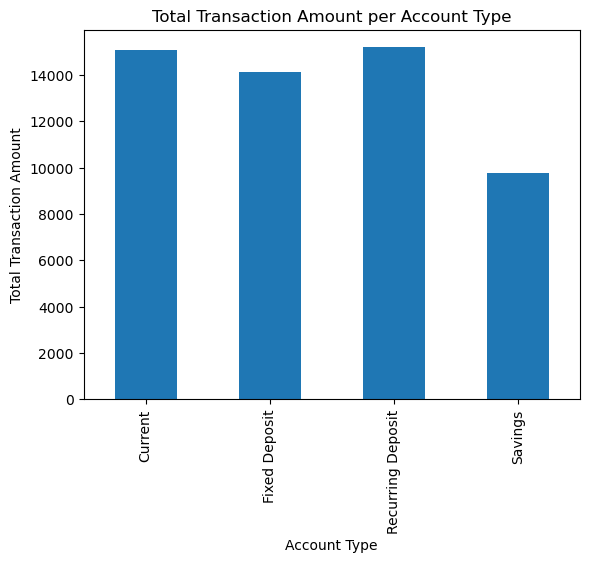

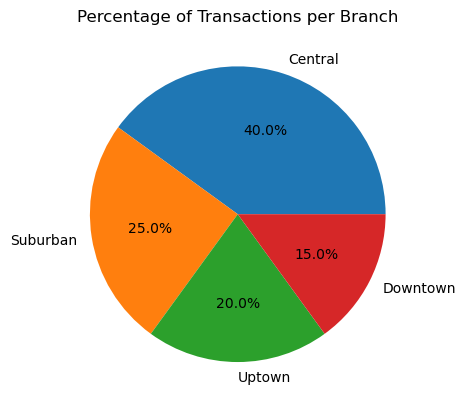

In [22]:
#Day 12
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Day_12_banking_data.csv')

transaction_sum = df.groupby('Account_Type')['Transaction_Amount'].sum()
transaction_sum.plot(kind='bar', title='Total Transaction Amount per Account Type')
plt.xlabel('Account Type')
plt.ylabel('Total Transaction Amount')
plt.show()

branch_transactions = df['Branch'].value_counts()
branch_transactions.plot(kind='pie', autopct='%1.1f%%', title='Percentage of Transactions per Branch')
plt.ylabel('')
plt.show()

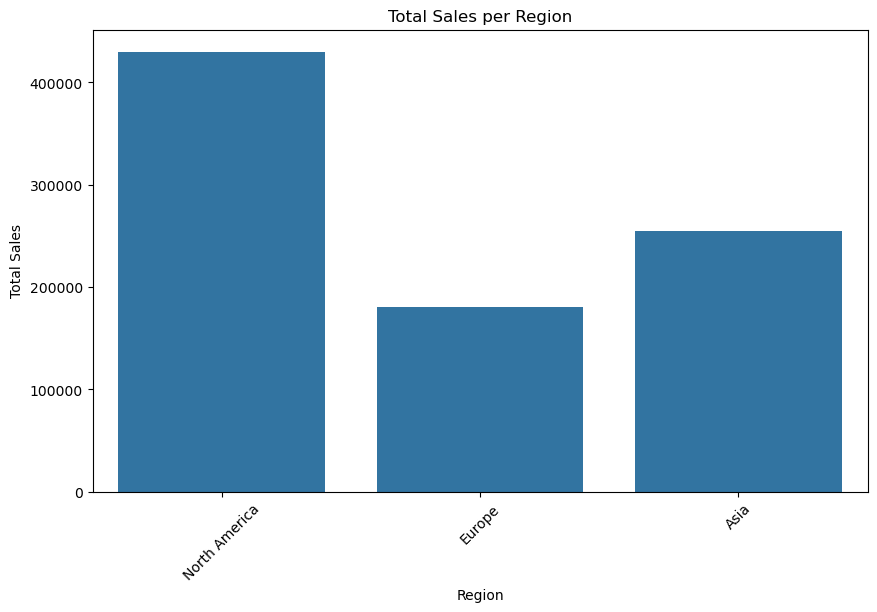

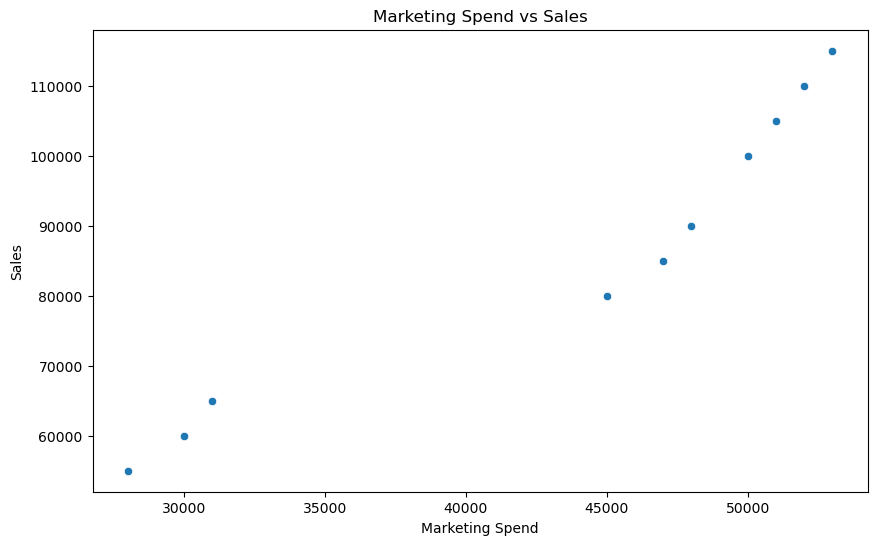

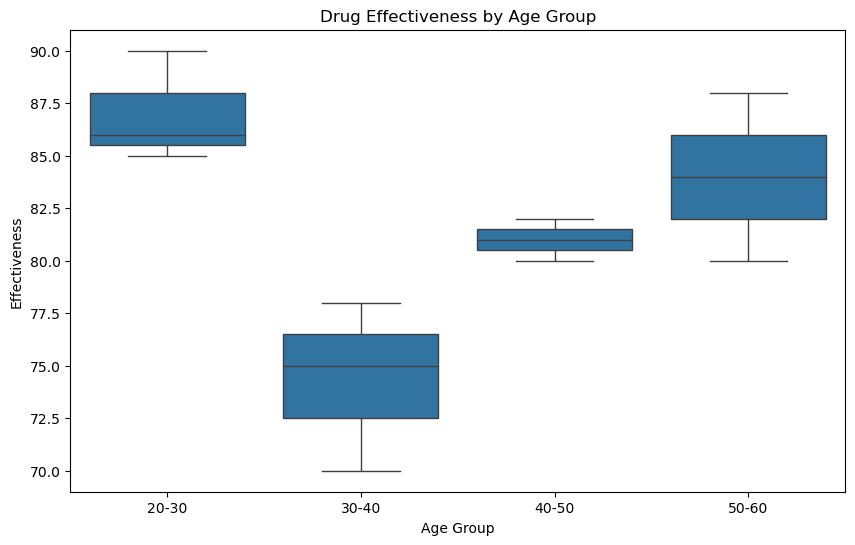

Skipping line plot: 'Product' column is missing.


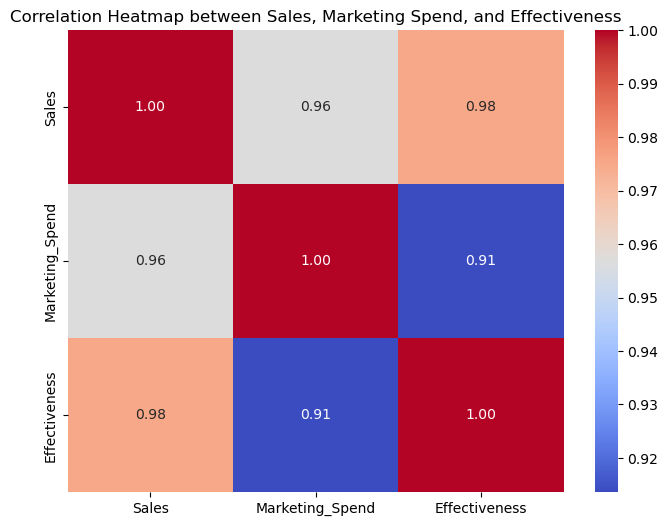

In [4]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:

#Day 13
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('Day_13_Pharma_data.csv')
except FileNotFoundError:
    print("Error: File 'Day_13_Pharma_data.csv' not found.")
    exit()

df.drop_duplicates(inplace=True)

required_columns = ['Region', 'Sales', 'Marketing_Spend', 'Effectiveness', 'Age_Group', 'Product', 'Trial_Period']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Warning: Missing columns in the dataset: {missing_columns}")

if 'Region' in df.columns and 'Sales' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Region', y='Sales', data=df, estimator='sum', errorbar=None)
    plt.title('Total Sales per Region')
    plt.ylabel('Total Sales')
    plt.xlabel('Region')
    plt.xticks(rotation=45)
    plt.show()

if 'Marketing_Spend' in df.columns and 'Sales' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Marketing_Spend', y='Sales', data=df)
    plt.title('Marketing Spend vs Sales')
    plt.xlabel('Marketing Spend')
    plt.ylabel('Sales')
    plt.show()

if 'Age_Group' in df.columns and 'Effectiveness' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Age_Group', y='Effectiveness', data=df)
    plt.title('Drug Effectiveness by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Effectiveness')
    plt.show()

if 'Trial_Period' in df.columns and 'Sales' in df.columns and 'Product' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Trial_Period', y='Sales', hue='Product', data=df, marker='o')
    plt.title('Sales Trend per Product Over Trial Periods')
    plt.xlabel('Trial Period')
    plt.ylabel('Sales')
    plt.show()
elif 'Trial_Period' in df.columns and 'Sales' in df.columns:
    print("Skipping line plot: 'Product' column is missing.")

if all(col in df.columns for col in ['Sales', 'Marketing_Spend', 'Effectiveness']):
    correlation_matrix = df[['Sales', 'Marketing_Spend', 'Effectiveness']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap between Sales, Marketing Spend, and Effectiveness')
    plt.show()
else:
    print("Skipping heatmap: Required columns for correlation are missing.")


# In[ ]:




